## Week 2: Introduction to Supervised Learning 1
### Goal of this notebook:
The goal of this notebook is to apply K-Nearest Neighbour (KNN) and Bagging Algorithm on the iris dataset. 

In [41]:
from sklearn import datasets
iris_data, iris_labels = datasets.load_iris(return_X_y=True, as_frame=False)
print("The dimensions of the Iris feature matrix", iris_data.shape)
print(iris_data[:5])

The dimensions of the Iris feature matrix (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Explore the dataset
Right, now let's explore the dataset and see the labels and features.

* Read about the Iris dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html
* What type of labels does it have (real continuous or categorical)? What kind of machine learning task is this type of label suited to, i.e. classification or regression?
  * Based on documentation and after inspecting the dataset, it has categorical labels, so classification is more appropriate for this dataset.
* What is the feature dimensionality of the dataset, i.e. the number of features?
  * it has 4 features: Sepal length, Sepal width, Petal length, Petal width
* How many data instances are there? What is the distribution of instances across classes?
  * 150 data instances, distributed equally



---


* Select one of the features. What association does the selected feature have with the iris classes, with respect to differentiating between them (Hint - use a search engine to read about Iris Setosa, Iris Versicolour, and Iris Virginica plant)?
* What factors do you think limited the number of data instances per class?
* How do you think the data was collected? What implication would this have for real world deployment of a model for automatic detection of iris classes based on this dataset?
* How do you think it was labelled? What kind of challenge might this pose for collection of more training data (and labels) for automatic detection of iris classes?

---
Right, now that we have the dataset imported. Let's split it into 50:50 training:test.

In [42]:
import numpy as np
import pandas as pd
random_seed = 1
rng = np.random.default_rng(random_seed)
# add indices to the data
random_inds = np.arange(iris_data.shape[0],)
# shuffle the indices
rng.shuffle(random_inds)
split_point = int(0.5 * iris_labels.shape[0])
# split the indices
training_data = iris_data[random_inds[:split_point], :]
training_labels = iris_labels[random_inds[:split_point]]
testing_data = iris_data[random_inds[split_point:], :]
testing_labels = iris_labels[random_inds[split_point:]]

training_data_df = pd.DataFrame(training_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
testing_data_df = pd.DataFrame(testing_data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
print(training_data_df.describe())
print(testing_data_df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count     75.000000    75.000000      75.00000    75.000000
mean       5.766667     3.112000       3.57600     1.116000
std        0.859971     0.398294       1.84155     0.761229
min        4.300000     2.400000       1.00000     0.100000
25%        5.100000     2.800000       1.50000     0.300000
50%        5.700000     3.000000       4.20000     1.300000
75%        6.350000     3.400000       5.10000     1.800000
max        7.900000     4.100000       6.70000     2.500000
       sepal_length  sepal_width  petal_length  petal_width
count     75.000000    75.000000     75.000000    75.000000
mean       5.920000     3.002667      3.940000     1.282667
std        0.793214     0.466723      1.678159     0.759156
min        4.400000     2.000000      1.300000     0.100000
25%        5.250000     2.700000      1.650000     0.350000
50%        6.000000     3.000000      4.500000     1.300000
75%        6.450000     3.300000      5.

Perfecto, Now let's use KNN to train and test, then check the accuracy!

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data, training_labels)
predicted_labels = knn.predict(testing_data)
accuracy = accuracy_score(testing_labels, predicted_labels)
print("The accuracy of the classifier is", accuracy)    

The accuracy of the classifier is 0.9866666666666667


Let's explore the differences visually

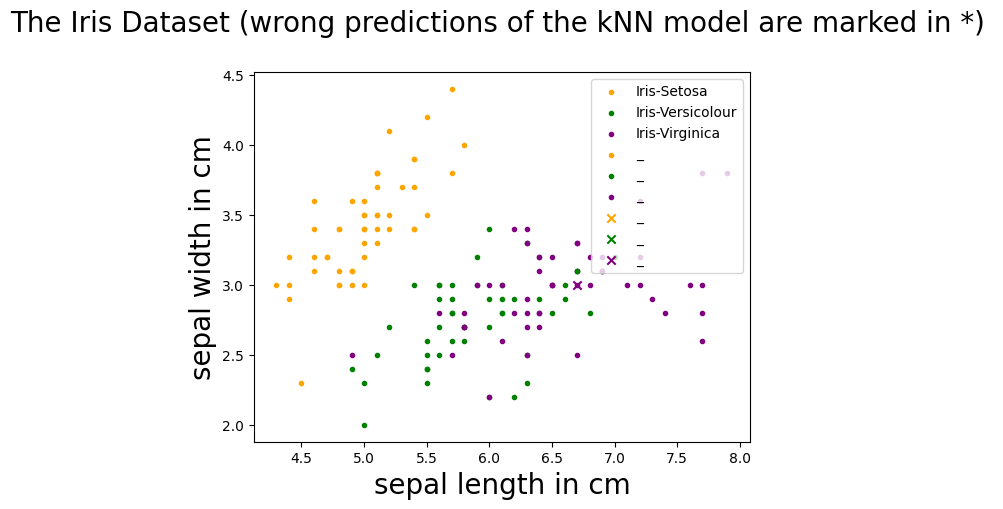

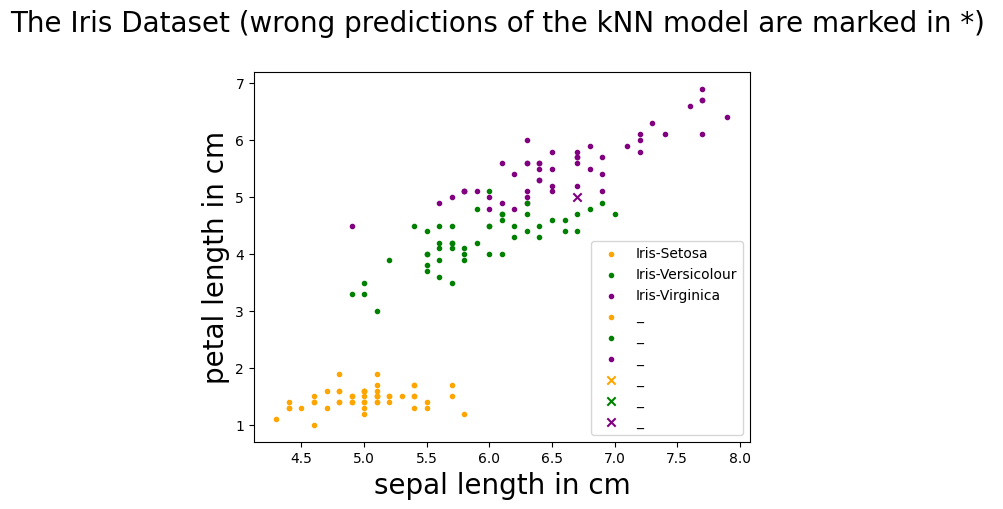

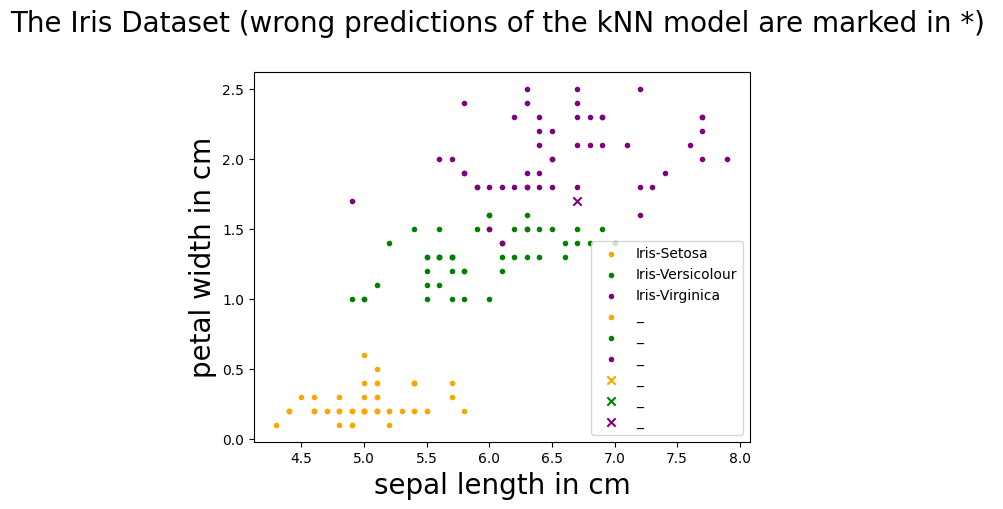

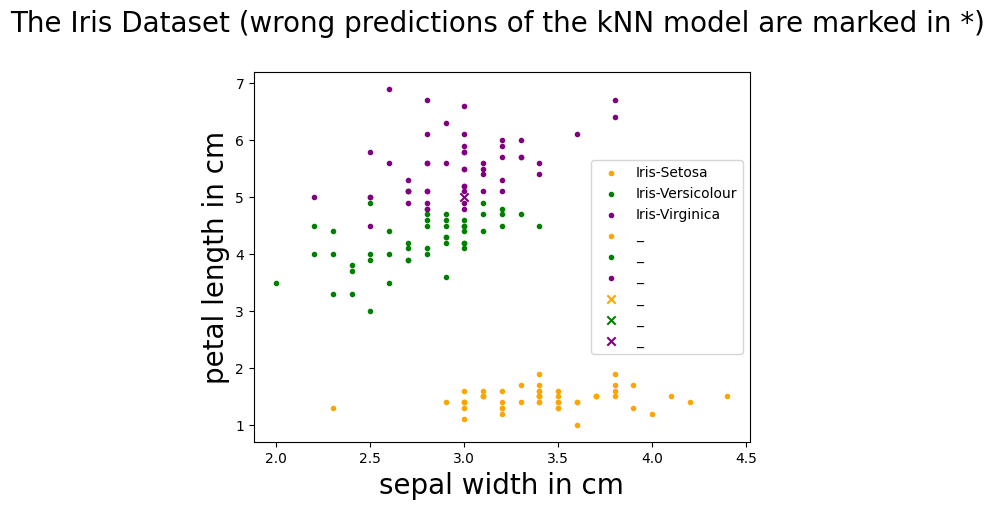

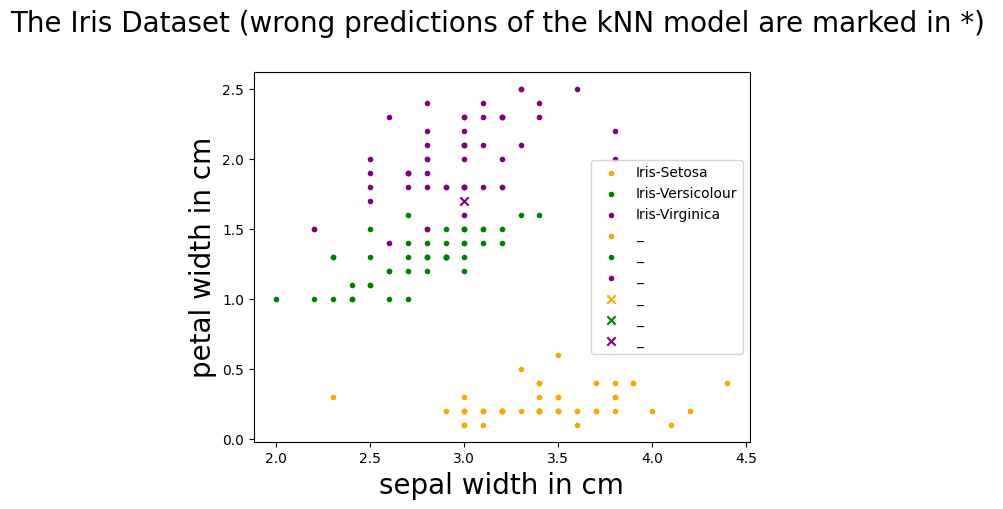

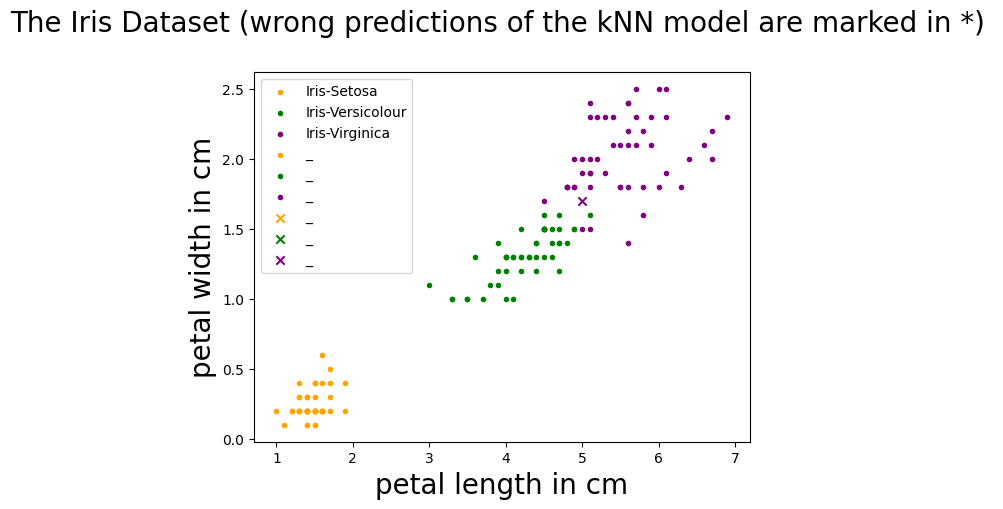

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
import warnings


feature_names = ['sepal length in cm', 'sepal width in cm',
                 'petal length in cm', 'petal width in cm']

# Creating a method for plotting the 3 different classes by different colours
def plot_by_class(ax, data1, data2, labels, marker='.'):

  class_0 = labels == 0
  ax.scatter(data1[class_0], data2[class_0], color='orange', marker=marker, label='Iris-Setosa')

  class_1 = labels == 1
  ax.scatter(data1[class_1], data2[class_1], color='green', marker=marker, label='Iris-Versicolour')

  class_2 = labels == 2
  ax.scatter(data1[class_2], data2[class_2], color='purple', marker=marker, label='Iris-Virginica')

  return ax


# Setting up to plot only 2 of the 4 features at a time
# since it is impossible to create a 4D plot
for i in np.arange(0, iris_data.shape[1]):

  for j in np.arange(i, iris_data.shape[1]):


    if i != j:

      fig, ax = plt.subplots()

      # Plotting the training data
      # and colour coding by the labels
      ax = plot_by_class(ax, training_data[:, i], training_data[:, j], training_labels)

      # Plotting the test data
      # and differentiating between correct and incorrect predictions
      incorrect_pred = testing_labels != predicted_labels
      correct_pred = testing_labels == predicted_labels
      ax = plot_by_class(ax, testing_data[correct_pred, i], testing_data[correct_pred, j], testing_labels[correct_pred])
      ax = plot_by_class(ax, testing_data[incorrect_pred, i], testing_data[incorrect_pred, j], predicted_labels[incorrect_pred], marker='x')

      plt.xlabel(feature_names[i], size=20)
      plt.ylabel(feature_names[j], size=20)
      plt.title('The Iris Dataset (wrong predictions of the kNN model are marked in *) \n', size=20)
      print()

      with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        ax.legend(labels=['Iris-Setosa', 'Iris-Versicolour',
                        'Iris-Virginica', '_',
                        '_', '_', '_', '_', '_'])

        plt.show()

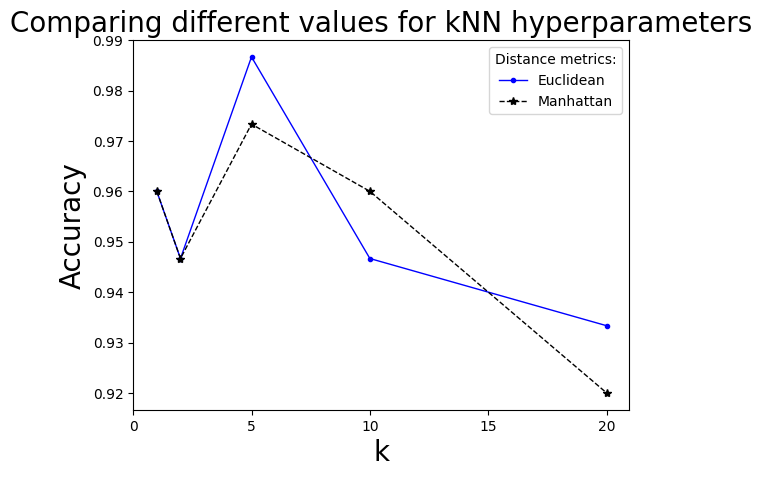

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set up different values of k
ks = [1, 2, 5, 10, 20]

# Initialize variables
acc_euclidean = np.zeros(len(ks),)
acc_manhattan = np.zeros(len(ks),)
counter = 0


for k in ks:

  # Train and evaluate kNN model with Euclidean distance metric
  model_kNN_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  model_kNN_euclidean.fit(training_data, training_labels)
  acc_euclidean[counter] = accuracy_score(testing_labels, model_kNN_euclidean.predict(testing_data))



  # Train and evaluate kNN model with Manhattan distance metric
  model_kNN_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  model_kNN_manhattan.fit(training_data, training_labels)
  acc_manhattan[counter] = accuracy_score(testing_labels, model_kNN_manhattan.predict(testing_data))

  counter += 1



# Plot data
plt.plot(ks, acc_euclidean, "b.-", linewidth=1, label='Euclidean')
plt.plot(ks, acc_manhattan, "k*--", linewidth=1, label='Manhattan')

plt.xlabel('k', size=20)
plt.xticks(np.arange(0, 21, step=5))
plt.ylabel('Accuracy', size=20)
plt.title('Comparing different values for kNN hyperparameters', size=20)
plt.legend(title='Distance metrics:')

plt.show()


Ok, now that we tested for Euclidean and Manhattan distances, let's do the Bagging model and check the results.

Bagging (Bootstrap Aggregating) Classifier is an ensemble learning technique that improves the stability and accuracy of machine learning models by combining multiple instances of the same model trained on different subsets of the data.


How It Works:
- Multiple models (often decision trees) are trained on different bootstrapped subsets of the training data.
- Each model makes predictions independently.
- The final prediction is obtained by majority voting (for classification) or averaging (for regression).

Advantages:
- Reduces variance and prevents overfitting.
- Works well with high-variance models like decision trees.
- Improves accuracy over a single model.

Common Algorithm:
- BaggingClassifier in Scikit-learn (often used with Decision Trees).
- Random Forest is a popular example of bagging applied to decision trees.

When to use which?
- Use Bagging Classifier when you need a robust, high-performance model that reduces variance, especially for tree-based algorithms.
- Use KNN when the dataset is small, structured, and the wehn instance-based learning makes sense (e.g recommendation systems).
- 

In [63]:
from sklearn.ensemble import BaggingClassifier
import math

# Set the max number of features to be used to split each node for each tree
max_feats = int(math.sqrt(training_data.shape[1]))

model_B = BaggingClassifier(n_estimators=100, max_features=max_feats, random_state=random_seed)
model_B.fit(training_data, training_labels)
test_predictions_B = model_B.predict(testing_data)


print("\n What proportion of the Bagging test predictions were correct? %.2f " % accuracy_score(testing_labels, test_predictions_B))


 What proportion of the Bagging test predictions were correct? 0.97 


Perfect, now let's try different hyperparameters of bagging model.
* Try different numbers of base classifiers, i.e. trees, e.g. n = 1, 10, 100, 1000. What effect of the number of trees do you notice?


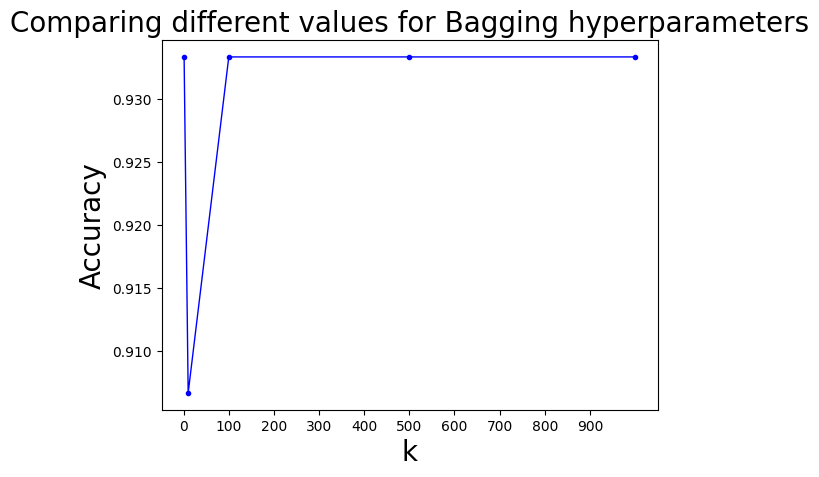

In [49]:
%matplotlib inline


# Set up different numbers of trees
ntrees = [1, 10, 100, 500, 1000]

# Initialize variables
acc_B = np.zeros(len(ntrees),)
counter = 0




for nt in ntrees:

  model_B = BaggingClassifier(n_estimators=nt, max_features=max_feats, random_state=random_seed)
  model_B.fit(training_data, training_labels)
  acc_B[counter] = accuracy_score(testing_labels, model_B.predict(testing_data))

  counter += 1



# Plot data
plt.plot(ntrees, acc_B, "b.-", linewidth=1)

plt.xlabel('k', size=20)
plt.xticks(np.arange(0, 1000, step=100))
plt.ylabel('Accuracy', size=20)
plt.title('Comparing different values for Bagging hyperparameters', size=20)

plt.show()



Perfect, now let's test whether changing the training:testing percentage will change the accuracy!

In [67]:
# Randomly split the data into 80:20 training:test sets
random_seed = 1
rng =  np.random.default_rng(random_seed)
rand_inds = np.arange(iris_labels.shape[0],)
rng.shuffle(rand_inds)
split_point = int(0.8*iris_labels.shape[0])

training_data = iris_data[rand_inds[0:split_point], :]
training_labels = iris_labels[rand_inds[0:split_point]]
test_data = iris_data[rand_inds[split_point:iris_labels.shape[0]], :]
test_labels = iris_labels[rand_inds[split_point:iris_labels.shape[0]]]

print("Size of the training data:", training_data.shape)
print("Size of the ttest data:", test_data.shape)
print()

model_B2 = BaggingClassifier(n_estimators=100, max_features=max_feats, random_state=random_seed)
model_B2.fit(training_data, training_labels)
test_predictions_B2 = model_B2.predict(test_data)

print("\n What proportion of the Bagging test predictions were correct? %.2f " % accuracy_score(test_labels, test_predictions_B2))


Size of the training data: (120, 4)
Size of the ttest data: (30, 4)


 What proportion of the Bagging test predictions were correct? 0.93 
